In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and inspecting the dataset

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
## Inspecting first few lines of df ##
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Having summary statistics given about dataset ##
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Target will be Survived column as we are aiming to predict if individuals survived or not. Binary column, giving 0 for did not survive, 1 for did.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Age given as a float as a result of fractional ages given for under 1 year olds. SibSp gives number of siblings/spouses aboard, hence int. Cabin contains mix of str and ints so object. Embarked could be str as should only have one of 3 characters as a value. Further investigating values present/looking for NaNs

In [7]:
## Checking uniques ##
print("Of 891 unique passengers within this dataset there were:")
print(df.nunique())

Of 891 unique passengers within this dataset there were:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [8]:
## Checking for NaNs ##
print(df.isnull().values.any())
print(test.isnull().values.any())

True
True


In [9]:
## NaNs confirmed as present, finding them ##
print(df.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 177 Null ages, 687 Null cabins (possibly did not have a cabin?), 2 missing points of embarking. Considering now how to deal with the missing values

['S' 'C' 'Q' nan]


Text(0.5, 1.0, 'Distribution of ports departed from, dropped nan')

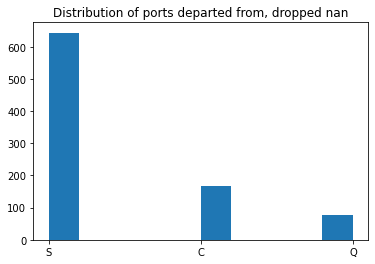

In [10]:
## As there are only 2 missing values for embarked, it may be worth checking to see the most common port ##
print(df['Embarked'].unique())
ax = plt.hist(df['Embarked'].dropna())
plt.title('Distribution of ports departed from, dropped nan')

In [11]:
## S considerably more common than the others, setting nans to S ##
df['Embarked'].fillna('S', inplace=True)
## Checking replaced successfully ##
print(df['Embarked'].unique())

['S' 'C' 'Q']


### Next, the missing cabin data. Operating under the assumption that this was either the absence of a cabin or an entirely different cabin, replacing nans with a new made up value (categorical so name unimportant)

In [12]:
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [13]:
## Lots of cabins. Replacing nan ##
df['Cabin'].fillna('Other', inplace=True)
test['Cabin'].fillna('Other', inplace=True)
print(df['Cabin'].unique())

['Other' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


### Nans replaced with dumb alternative value. Replacing nans in missing age may be more difficult as it is hard to assess age in individuals based off the given characteristics.

Missing ages: 891


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


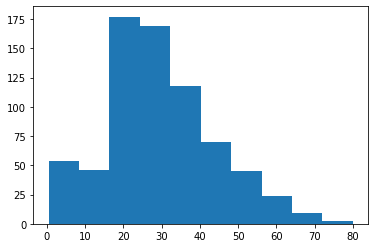

In [14]:
## Viewing distribution of ages ##
plt.hist(df['Age'])
print(f"Missing ages: {df['Age'].isnull().count()}")

In [15]:
## I am interested in seeing if sampling using this distribution (and thus maintaining the same spread of ages) will be viable
## Dropping nans prior to sampling to avoid including them ##
sampling_df = df['Age'].dropna().sample(n = 177, random_state = 1)
sampling_test = df['Age'].dropna().sample(n=86, random_state = 1)
## Checking no nans included ##
print(sampling_df.isnull().sum())
print(list(sampling_df))

0
[15.0, 7.0, 33.0, 14.0, 21.0, 42.0, 23.0, 56.0, 39.0, 24.0, 27.0, 22.0, 45.5, 52.0, 33.0, 3.0, 26.0, 22.0, 31.0, 47.0, 19.0, 61.0, 14.0, 60.0, 29.0, 25.0, 48.0, 19.0, 24.0, 23.0, 36.0, 62.0, 0.83, 33.0, 25.0, 19.0, 40.0, 21.0, 36.0, 41.0, 30.0, 28.5, 47.0, 27.0, 31.0, 59.0, 16.0, 58.0, 28.0, 33.0, 15.0, 45.0, 32.0, 44.0, 28.0, 9.0, 24.0, 19.0, 2.0, 3.0, 26.0, 4.0, 32.0, 25.0, 28.0, 33.0, 3.0, 32.0, 1.0, 25.0, 34.0, 22.0, 1.0, 13.0, 18.0, 32.0, 31.0, 43.0, 37.0, 21.0, 31.0, 40.0, 56.0, 19.0, 18.0, 22.0, 45.0, 26.0, 71.0, 18.0, 34.0, 16.0, 0.67, 39.0, 5.0, 49.0, 45.0, 27.0, 54.0, 35.0, 38.0, 47.0, 20.0, 47.0, 36.0, 14.0, 39.0, 52.0, 25.0, 17.0, 2.0, 30.0, 29.0, 30.0, 28.0, 31.0, 36.0, 19.0, 22.0, 54.0, 22.0, 35.0, 33.0, 21.0, 45.0, 30.0, 31.0, 20.0, 33.0, 4.0, 17.0, 22.0, 24.0, 34.0, 27.0, 28.0, 9.0, 32.0, 39.0, 19.0, 24.0, 17.0, 25.0, 15.0, 24.0, 36.5, 28.0, 22.0, 25.0, 74.0, 23.0, 35.0, 19.0, 34.0, 38.0, 49.0, 20.0, 22.0, 64.0, 9.0, 38.0, 20.0, 20.0, 26.0, 30.5, 4.0, 34.0, 22.0, 16.0

In [16]:
## Applyingt the sampled values to the nan values in the original age column ##
df.loc[df.Age.isnull(), 'Age'] = list(sampling_df)
test.loc[test.Age.isnull(), 'Age'] = list(sampling_test)

In [17]:
## Checking it ran and got rid of em ##
print(df['Age'].isnull().sum())
print(df['Age'].unique())

0
[22.   38.   26.   35.   15.   54.    2.   27.   14.    4.   58.   20.
 39.   55.    7.   31.   33.   34.   28.    8.   19.   21.   42.   40.
 23.   56.   66.   18.   24.    3.   45.5  52.   49.   29.   65.   28.5
  5.   11.   45.   17.   32.   16.   25.    0.83 30.   47.   46.   59.
 61.   71.   37.   60.   14.5  70.5  32.5  12.   48.    9.   36.5  51.
 55.5  40.5  36.   62.   44.    1.   50.   41.   20.5  63.   23.5   0.92
 43.   13.   10.   64.    0.67  0.75 53.   57.   80.   70.   24.5   6.
 74.   30.5   0.42 34.5 ]


### Shoving the mean of fares into the missing value in the test data

In [18]:
## Finding mean of fares
mean = df['Fare'].mean()
test['Fare'].fillna(mean, inplace=True)

### Final sanity check that nans have been dealt with

In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Applying Random Forest to avoid standardisation

In [20]:
## Encoding/Dummying columns which need it ##
from sklearn.preprocessing import LabelEncoder 
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [21]:
## Getting dummies for other ones ##
dummied_df = pd.get_dummies(df, columns = ['Pclass', 'SibSp', 'Parch', 'Embarked'])

## Will need to apply to test data as well ##
test = pd.get_dummies(test, columns = ['Pclass', 'SibSp', 'Parch', 'Embarked'])
print(dummied_df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [25]:
from sklearn.ensemble import RandomForestClassifier
y = df['Survived']

## Establishing X data to use ##
X = dummied_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X['Parch_9'] = 0
x_test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X, y)


RandomForestClassifier(max_depth=5, random_state=1)

In [26]:
print(X.columns)
print(x_test.columns)

Index(['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Parch_9'],
      dtype='object')
Index(['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [27]:
## Getting predictions from test data ##
predictions = model.predict(x_test)

In [28]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [29]:
## Putting in Kaggle appropriate format ##
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
print(test.PassengerId)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [30]:
output.to_csv('submission.csv', index=False)